## Problem 1

### 1.

In [1]:
import cmath
import math
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

def DFT(image):
    
    N = image.shape[0]
    M = image.shape[1]
    
    outputImg = np.zeros(image.shape, dtype = np.complex_)
    
    for i in range(N):
        for j in range(M):
            
            val = 0
            for u in range(N):
                
                Wn = complex(math.cos((2.0*np.pi*u*i)/N), -math.sin((2.0*np.pi*u*i)/N))
                
                for v in range(M):
                    
                    Wm = complex(math.cos((2.0*np.pi*v*j)/M), -math.sin((2.0*np.pi*v*j)/M)) 
                    val += image[u][v] * Wn * Wm
                    
            outputImg[i][j] = val
    
    return outputImg


def IDFT(image):
    
    N = image.shape[0]
    M = image.shape[1]
    
    outputImg = np.zeros(image.shape)
    
    for i in range(N):
        for j in range(M):
            
            val = 0
            for u in range(N):
                
                Wn = complex(math.cos((-2.0*np.pi*u*i)/N), -math.sin((-2.0*np.pi*u*i)/N))
                
                for v in range(M):
                    
                    Wm = complex(math.cos((-2.0*np.pi*v*j)/M), -math.sin((-2.0*np.pi*v*j)/M)) 
                    val += image[u][v] * Wn * Wm
                    
            outputImg[i][j] = np.round(val.real/(M*N))
    
    return outputImg

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# reading the image
aerial = 'misc/5.1.10.tiff'
airplane = 'misc/5.1.11.tiff'
clock = 'misc/5.1.12.tiff'
moon = 'misc/5.1.09.tiff'

imgAerial = mpimg.imread(aerial)
imgAirplane = mpimg.imread(airplane)
imgClock = mpimg.imread(clock)
imgMoon = mpimg.imread(moon)


# cropping images
imgAerial = imgAerial[95:159, 95:159]
imgMoon = imgMoon[112:144, 112:144]

In [3]:
# get real and imaginary part of the images after applying DFT
def getDFT_real_imag(image):
    
    N = image.shape[0]
    M = image.shape[1]
    
    Ireal = np.zeros(image.shape)
    Iimag = np.zeros(image.shape)
    
    for i in range(N):
        for j in range(M):
            
            valReal = 0
            valImag = 0
            
            
            for u in range(N):
                for v in range(M):
                    
                    temp = math.cos((2.0*np.pi*u*i)/N + (2.0*np.pi*v*j)/M)
                    valReal += image[u][v] * temp
                    
                    temp = math.sin((2.0*np.pi*u*i)/N + (2.0*np.pi*v*j)/M)
                    valImag -= image[u][v] * temp
                    
            Ireal[i][j] = valReal
            Iimag[i][j] = valImag
    
    return Ireal, Iimag


# get magnitude and phase images
def MagPhase(image):
    
    Ireal, Iimag = getDFT_real_imag(image)

    I_Mag = np.sqrt((Ireal)**2 + (Iimag)**2)
    I_Phase = np.arctan(Iimag/Ireal)
    return I_Mag, I_Phase


# linear point operation
def LinearPointOp(image, P, L):
    
    outputImg = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            outputImg[i][j] = int(P * image[i][j] + L)
            outputImg[i][j] = min(outputImg[i][j], 255)
            outputImg[i][j] = max(outputImg[i][j], 0)
            
    return outputImg


# FSCS
def FSCS(image):
    
    A = np.amin(image)
    B = np.amax(image)

    K = 256
    
    # P
    P = (K - 1)/(B - A)

    # L
    L = (-A) * P

    imgFSCS = LinearPointOp(image, P, L)
    
    return imgFSCS

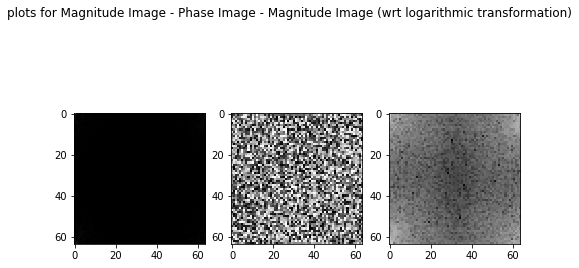

In [4]:
I_Mag, I_Phase = MagPhase(imgAerial)
imgLog = FSCS(np.log2(1 + I_Mag))

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (8, 8))
fig.subplots_adjust(hspace = .5)
ax[0].imshow(I_Mag, cmap = 'gray')
ax[1].imshow(I_Phase, cmap = 'gray')
ax[2].imshow(imgLog, cmap = 'gray')
fig.suptitle('plots for Magnitude Image - Phase Image - Magnitude Image (wrt logarithmic transformation)', y = .8)
plt.show()

In [5]:
def centeredDFT(image):
    
    outputImg = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            outputImg = image * pow(-1, i + j)

    Ireal, Iimag = getDFT_real_imag(outputImg)
    I_Mag = np.sqrt((Ireal)**2 + (Iimag)**2)

    imgplot = plt.imshow(I_Mag, cmap = 'gray')

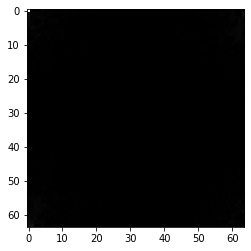

In [6]:
centeredDFT(imgAerial)

In [7]:
if (IDFT(DFT(imgAerial)) == imgAerial).all():
    print('yes')
else:
    print('no')

yes


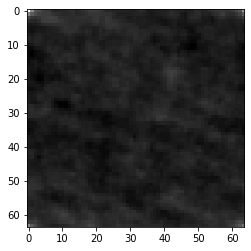

In [8]:
IPhaseT = I_Phase.T

img = np.zeros(IPhaseT.shape, dtype = np.complex_)
for i in range(IPhaseT.shape[0]):
    for j in range(IPhaseT.shape[1]):
        img[i][j] = I_Mag[i][j] * np.exp(1j * IPhaseT[i][j])
        
imgplot = plt.imshow(IDFT(img), cmap = 'gray')

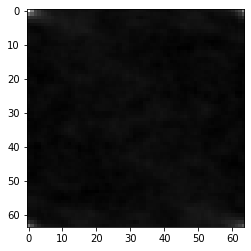

In [9]:
imgplot = plt.imshow(IDFT(I_Mag), cmap = 'gray')

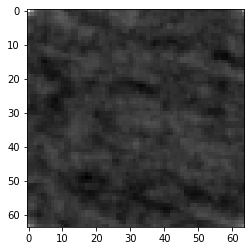

In [10]:
gaussianNoise = np.random.normal(0, 1, (I_Phase.shape[0], I_Phase.shape[1]))
IPhaseNoise = I_Phase + gaussianNoise

img = np.zeros(IPhaseNoise.shape, dtype = np.complex_)
for i in range(IPhaseNoise.shape[0]):
    for j in range(IPhaseNoise.shape[1]):
        img[i][j] = I_Mag[i][j] * np.exp(1j * IPhaseNoise[i][j])
        
imgplot = plt.imshow(IDFT(img), cmap = 'gray')

### 2.

In [11]:
def matrixDFT(image):
    
    N = image.shape[0]
    
    # forming the matrix
    W = np.zeros((N, N), dtype= np.complex_)
    
    for i in range(N):
        for j in range(N):
            W[i][j] = np.power(np.exp(-2*np.pi*1j/N), i*j)
            
    return (W.dot(image)).dot(W)

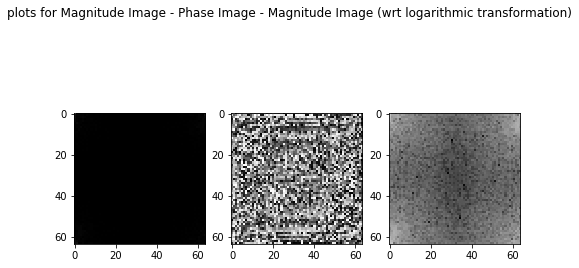

In [12]:
img = matrixDFT(imgAerial)
I_Mag, I_Phase = np.abs(img), np.angle(img)
imgLog = FSCS(np.log2(1 + I_Mag))

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (8, 8))
fig.subplots_adjust(hspace = .5)
ax[0].imshow(I_Mag, cmap = 'gray')
ax[1].imshow(I_Phase, cmap = 'gray')
ax[2].imshow(imgLog, cmap = 'gray')
fig.suptitle('plots for Magnitude Image - Phase Image - Magnitude Image (wrt logarithmic transformation)', y = .8)
plt.show()

In [13]:
if (IDFT(matrixDFT(imgAerial)) == imgAerial).all():
    print('yes')
else:
    print('no')

yes


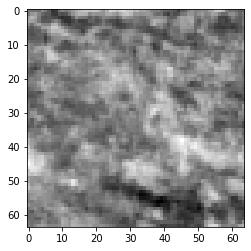

In [14]:
IPhaseT = I_Phase.T

img = np.zeros(IPhaseT.shape, dtype = np.complex_)
for i in range(IPhaseT.shape[0]):
    for j in range(IPhaseT.shape[1]):
        img[i][j] = I_Mag[i][j] * np.exp(1j * IPhaseT[i][j])
        
imgplot = plt.imshow(IDFT(img), cmap = 'gray')

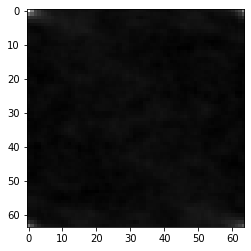

In [15]:
imgplot = plt.imshow(IDFT(I_Mag), cmap = 'gray')

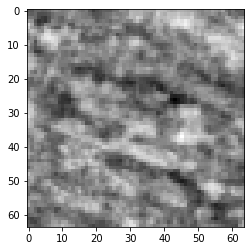

In [16]:
gaussianNoise = np.random.normal(0, 1, (I_Phase.shape[0], I_Phase.shape[1]))
IPhaseNoise = I_Phase + gaussianNoise

img = np.zeros(IPhaseNoise.shape, dtype = np.complex_)
for i in range(IPhaseNoise.shape[0]):
    for j in range(IPhaseNoise.shape[1]):
        img[i][j] = I_Mag[i][j] * np.exp(1j * IPhaseNoise[i][j])
        
imgplot = plt.imshow(IDFT(img), cmap = 'gray')

## Problem 2

### 1.

In [17]:
def circularConv(imageA, imageB):
    
    N = imageA.shape[0]
    M = imageA.shape[1]
    
    X = imageB.shape[0]
    Y = imageB.shape[1]
    
    J = np.zeros(imageA.shape, dtype = np.float)
    
    for i in range(N):
        for j in range(M):
            
            J[i][j] = 0
            for x in range(X):
                for y in range(Y):
                    
                    l = (i - x + N) % N
                    m = (j - y + M) % M
                        
                    J[i][j] += imageA[l][m] * imageB[x][y]
                    
    return J

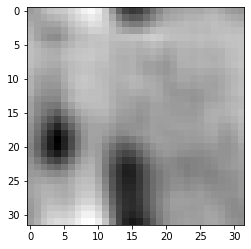

In [19]:
size = 5
avgFilter = np.zeros((size, size))
avgFilter.fill(1/(size**2))
        
J = circularConv(imgMoon, avgFilter)
imgplot = plt.imshow(J, cmap = 'gray')

In [41]:
def linearConv(imageA, imageB):
    
    imgA_ = np.zeros((2*imageA.shape[0], 2*imageA.shape[1]))
    imgB_ = np.zeros((2*imageB.shape[0], 2*imageB.shape[1]))
    
    N = imageA.shape[0]
    M = imageA.shape[1]
    
    for i in range(N):
        for j in range(M):
            imgA_[i][j] = imageA[i][j]
                    
    N = imageB.shape[0]
    M = imageB.shape[1]
    
    for i in range(N):
        for j in range(M):
            imgB_[i][j] = imageB[i][j]
            
    J = circularConv(imgA_, imgB_)
    return J

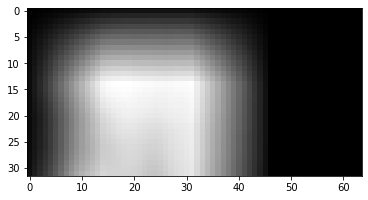

In [42]:
J = linearConv(imgMoon, avgFilter)
imgplot = plt.imshow(J[:imgMoon.shape[0]][:imgMoon.shape[1]], cmap = 'gray')

In [28]:
def circularConvMatrix(imageA, imageB):
    
    imgA_ = np.zeros(imageA.shape, dtype = np.complex_) 
    imgA_ = matrixDFT(imageA)
    
    imgB_ = np.zeros(imageB.shape, dtype = np.complex_)
    imgB_ = matrixDFT(imageB)
    
    return IDFT(imgA_ * imgB_)

In [32]:
imgA_ = np.zeros((2*imgMoon.shape[0], 2*imgMoon.shape[1]))
imgB_ = np.zeros((2*imgMoon.shape[0], 2*imgMoon.shape[1]))

N = imgMoon.shape[0]
M = imgMoon.shape[1]

for i in range(N):
    for j in range(M):
        imgA_[i][j] = imgMoon[i][j]

N = avgFilter.shape[0]
M = avgFilter.shape[1]

for i in range(N):
    for j in range(M):
        imgB_[i][j] = avgFilter[i][j]

J_ = circularConvMatrix(imgA_, imgB_)

In [45]:
if (J[:imgMoon.shape[0]][:imgMoon.shape[1]] == J_[:imgMoon.shape[0]][:imgMoon.shape[1]]).all():
    print('yes')

## Problem 3

### 1.

In [35]:
def DirectlinearConv(imageA, imageB):
    
    N = imageA.shape[0]
    M = imageA.shape[1]
    
    X = imageB.shape[0]
    Y = imageB.shape[1]
    
    J = np.zeros(imageA.shape, dtype = np.float)
    
    for i in range(N):
        for j in range(M):
            
            J[i][j] = 0
            for x in range(X):
                for y in range(Y):
                    
                    l = i - x
                    m = j - y
                    
                    if l < 0:
                        l = 0
                        
                    if m < 0:
                        m = 0
                    
                        
                    J[i][j] += imageA[l][m] * imageB[x][y]
                    
    return J

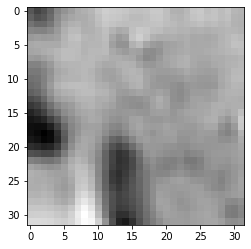

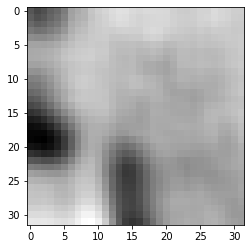

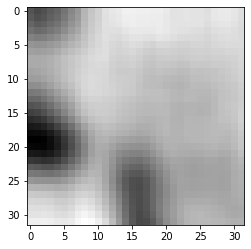

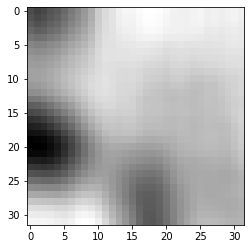

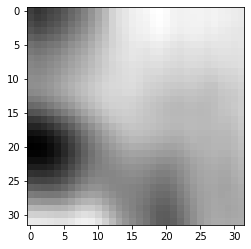

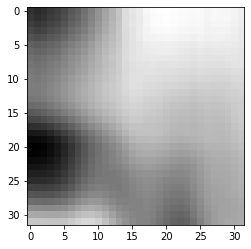

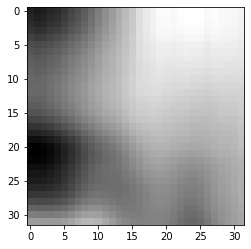

In [36]:
for i in range(3, 16, 2):
    
    avgFilter = np.zeros((i, i))
    avgFilter.fill(1/(i**2))
    
    J = DirectlinearConv(imgMoon, avgFilter)
    imgplot = plt.imshow(J, cmap = 'gray')
    plt.show()

In [37]:
'''As the window size increases we can observe that the image is getting blurred'''

'As the window size increases we can observe that the image is getting blurred'

### 2.

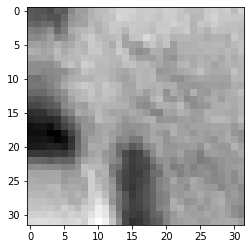

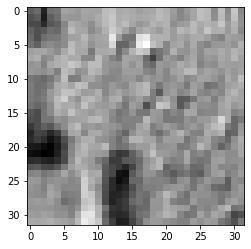

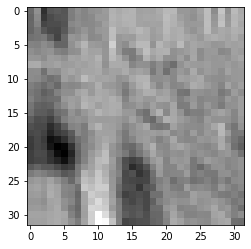

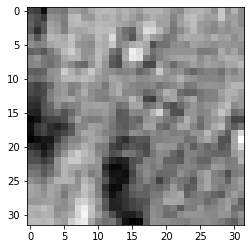

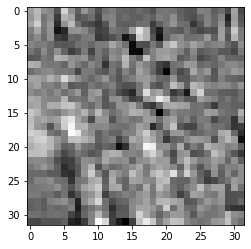

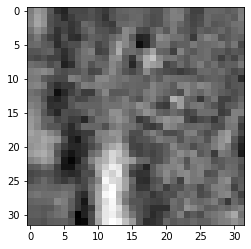

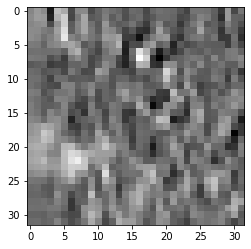

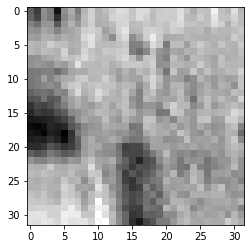

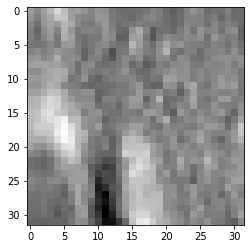

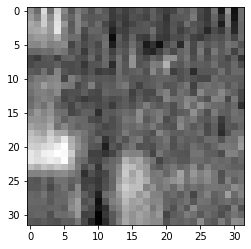

In [38]:
i = 0.5
while i <= 5:
    
    filter_ = np.random.normal(0, i, (5, 5))
    
    J = DirectlinearConv(imgMoon, filter_)
    imgplot = plt.imshow(J, cmap = 'gray')
    plt.show()
    
    i += 0.5